In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:/Users/ahadi/OneDrive/Desktop/CrimesOnWomenData.csv")

# Display the first few rows of the dataframe to understand the structure
print(df.head())


   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0


In [3]:
print(f"Dataset shape: {df.shape}")


Dataset shape: (736, 10)


In [5]:
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64


In [7]:
print("Statistical summary:")
print(df.describe())


Statistical summary:
       Unnamed: 0         Year         Rape           K&A           DD  \
count  736.000000   736.000000   736.000000    736.000000   736.000000   
mean   367.500000  2011.149457   727.855978   1134.542120   215.692935   
std    212.609188     6.053453   977.024945   1993.536828   424.927334   
min      0.000000  2001.000000     0.000000      0.000000     0.000000   
25%    183.750000  2006.000000    35.000000     24.750000     1.000000   
50%    367.500000  2011.000000   348.500000    290.000000    29.000000   
75%    551.250000  2016.000000  1069.000000   1216.000000   259.000000   
max    735.000000  2021.000000  6337.000000  15381.000000  2524.000000   

                AoW          AoM            DV          WT  
count    736.000000   736.000000    736.000000  736.000000  
mean    1579.115489   332.722826   2595.078804   28.744565  
std     2463.962518   806.024551   4042.004953   79.999660  
min        0.000000     0.000000      0.000000    0.000000  
25%    

In [9]:
print("Columns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['Unnamed: 0', 'State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV',
       'WT'],
      dtype='object')


In [11]:
df.rename(columns={
    'K&A': 'Kidnapping_Abduction', 
    'DD': 'Dowry_Deaths',
    'AoW': 'Assault_on_Women',
    'AoM': 'Assault_on_Men',
    'DV': 'Domestic_Violence',
    'WT': 'Trafficking'
}, inplace=True)

# Check updated column names
print(df.columns)


Index(['Unnamed: 0', 'State', 'Year', 'Rape', 'Kidnapping_Abduction',
       'Dowry_Deaths', 'Assault_on_Women', 'Assault_on_Men',
       'Domestic_Violence', 'Trafficking'],
      dtype='object')


In [13]:
statewise_crimes = df.groupby('State').sum()
print(statewise_crimes)


                   Unnamed: 0   Year   Rape  Kidnapping_Abduction  \
State                                                               
A & N ISLANDS            1810  20055     84                    58   
A & N Islands            6039  22176    340                   305   
ANDHRA PRADESH           1530  20055  10696                 11921   
ARUNACHAL PRADESH        1540  20055    412                   440   
ASSAM                    1550  20055  12762                 16368   
...                       ...    ...    ...                   ...   
UTTARAKHAND              1790  20055   1101                  1795   
Uttar Pradesh            6006  22176  30641                101701   
Uttarakhand              6017  22176   5106                 18524   
WEST BENGAL              1800  20055  16378                 13894   
West Bengal              6028  22176  13108                 37848   

                   Dowry_Deaths  Assault_on_Women  Assault_on_Men  \
State                            

In [15]:
yearwise_crimes = df.groupby('Year').sum()
print(yearwise_crimes)


      Unnamed: 0                                              State   Rape  \
Year                                                                         
2001         561  ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...  15694   
2002        1717  ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...  15970   
2003        2873  ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...  15357   
2004        4029  ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...  17682   
2005        5185  ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...  17701   
2006        6341  ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...  18725   
2007        7497  ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...  20139   
2008        8653  ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...  21001   
2009        9809  ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...  20928   
2010       10965  ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...  21665   
2011       12870  Andhra PradeshArunachal PradeshAssamBiharChhat

VISUALIZATION OF DATA

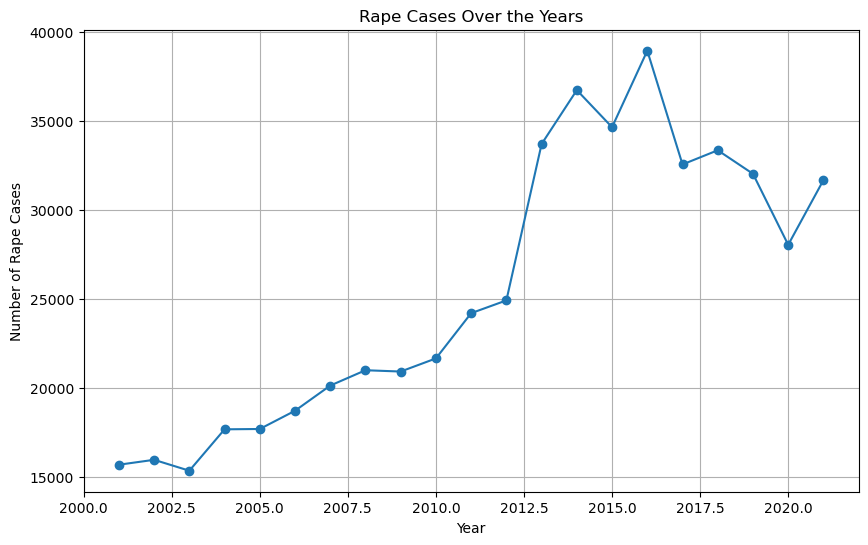

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df.groupby('Year')['Rape'].sum(), marker='o')
plt.title('Rape Cases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Rape Cases')
plt.grid(True)
plt.show()


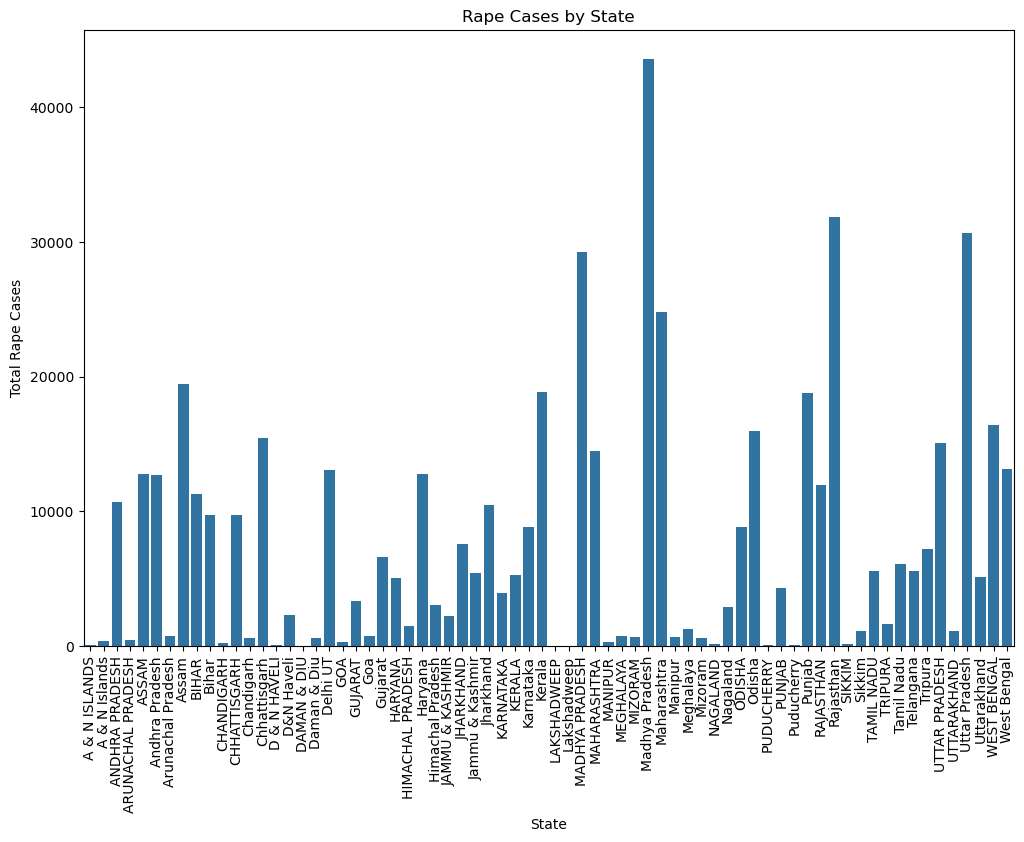

In [19]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.barplot(x=statewise_crimes.index, y=statewise_crimes['Rape'])
plt.xticks(rotation=90)
plt.title('Rape Cases by State')
plt.xlabel('State')
plt.ylabel('Total Rape Cases')
plt.show()


ACTUAL MODEL SELECTION AND DATA PREPROCESSING STARTS

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical variables (if any)
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])  # Example for categorical column

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])), columns=df.select_dtypes(include=['float64', 'int64']).columns)

# Adding back non-numeric columns if they were removed
df_imputed[df.select_dtypes(exclude=['float64', 'int64']).columns] = df.select_dtypes(exclude=['float64', 'int64'])
# Define features and target
# For simplicity, let's say we want to predict if the rape cases exceed a certain threshold
df_imputed['High_Rape'] = df_imputed['Rape'] > df_imputed['Rape'].median()

# Features and target
X = df_imputed.drop(columns=['Rape', 'High_Rape'])
y = df_imputed['High_Rape']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Convert categorical columns using one-hot encoding
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define features and target
df['High_Rape'] = df['Rape'] > df['Rape'].median()
X = df.drop(columns=['Rape', 'High_Rape'])
y = df['High_Rape']


TRAIN THE MODEL

In [43]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

APPLY LOGISTIC REGRESSION

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize models
logistic_model = LogisticRegression()

# Train Logistic Regression model
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Print evaluation metrics
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print("Classification Report:")
print(report_logistic)
print("Confusion Matrix:")
print(conf_matrix_logistic)



Logistic Regression:
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.95      0.92       123
        True       0.93      0.87      0.90        98

    accuracy                           0.91       221
   macro avg       0.92      0.91      0.91       221
weighted avg       0.92      0.91      0.91       221

Confusion Matrix:
[[117   6]
 [ 13  85]]


APPLY DECISION TREE ALGORITHM

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Initialize models
decision_tree_model = DecisionTreeClassifier()

# Train Decision Tree model
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

print("\nDecision Tree:")
print(f"Accuracy: {accuracy_tree:.2f}")
print("Classification Report:")
print(report_tree)
print("Confusion Matrix:")
print(conf_matrix_tree)



Decision Tree:
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.93      0.95       123
        True       0.91      0.96      0.94        98

    accuracy                           0.94       221
   macro avg       0.94      0.94      0.94       221
weighted avg       0.94      0.94      0.94       221

Confusion Matrix:
[[114   9]
 [  4  94]]


COMAPRE THROUGH ROC CURVE

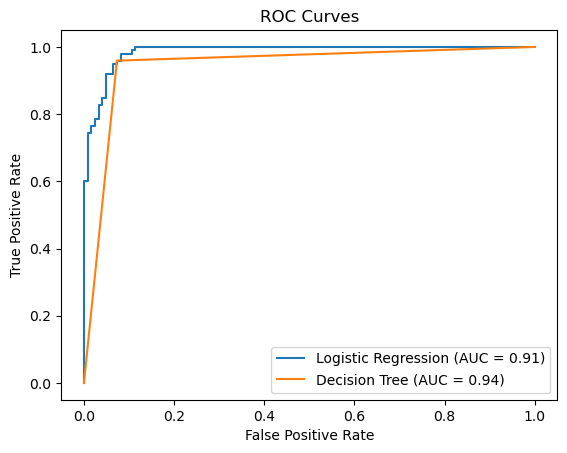

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:,1])
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_logistic):.2f})")

# ROC Curve for Decision Tree
fpr_tree, tpr_tree, _ = roc_curve(y_test, decision_tree_model.predict_proba(X_test)[:,1])
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_pred_tree):.2f})")

# Plot settings
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the models
lr = LogisticRegression()
dt = DecisionTreeClassifier()

# Train the models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)


DecisionTreeClassifier()

COMAPRING THROUGH HEATMAPS

Logistic Regression Accuracy: 0.9140271493212669
Decision Tree Accuracy: 0.9502262443438914


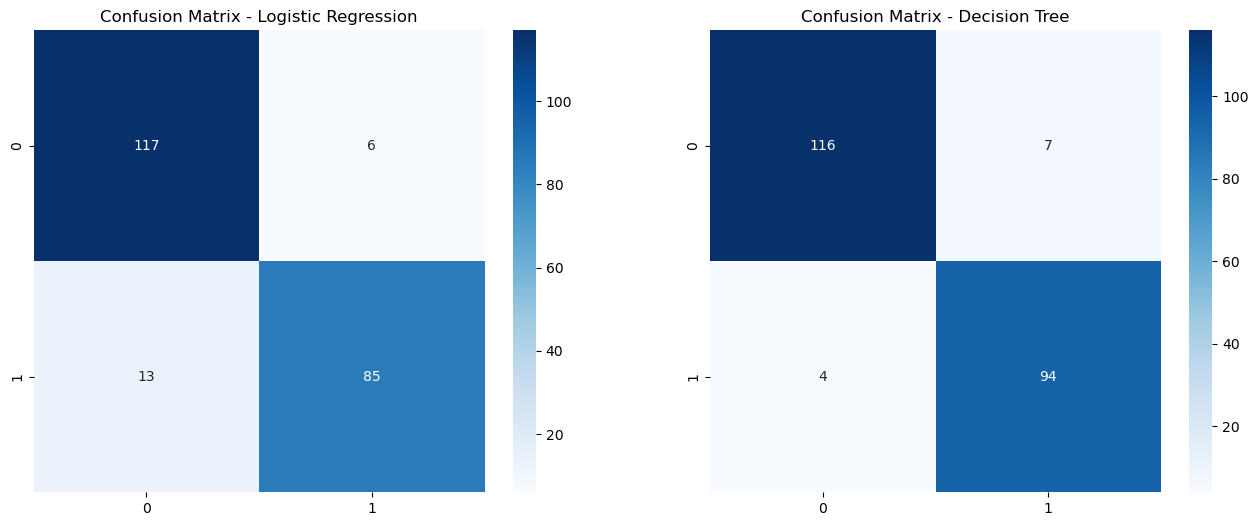

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.95      0.92       123
        True       0.93      0.87      0.90        98

    accuracy                           0.91       221
   macro avg       0.92      0.91      0.91       221
weighted avg       0.92      0.91      0.91       221

Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.94      0.95       123
        True       0.93      0.96      0.94        98

    accuracy                           0.95       221
   macro avg       0.95      0.95      0.95       221
weighted avg       0.95      0.95      0.95       221



In [65]:
# Make predictions
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Logistic Regression Accuracy: {accuracy_lr}')
print(f'Decision Tree Accuracy: {accuracy_dt}')

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Decision Tree')

plt.show()

# Display classification reports
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


THEREFORE WE CAN CONCLUDE THAT THE MODEL IS BETTER FITTED FOR DECISION TREE CLASSIFIER WITH AN ACCURACY OF 95%
AND FOR LOGISTIC REGRESSION 91%. THE MODEL IS A GOOD FIT.